## Final Assignment


Before working on this assignment please read the instructions fully. Use blackboard to submit a link to your repository. Upload a rendered document (html/pdf) as well as the original code. Please familiarize yourself with the criteria before beginning the assignment.

You should define a research question yourself based on at least two data sources that can be merged into a tidy dataset. The research question should be life science related. The research question should be a question with a causual nature. For instance questions like: How do independent variables X influence the dependent variable of Y? The research question should be answered with an interactive visual, and if possible tested for significance.
If you use code snippets from others you should refer to the original author, otherwise you will be accused of plagiarism. Please be prepared to explain your code in a verbal exam. 



Assessment criteria:

Conditional
- No data and or api-key information is stored in the repository.
- No hard datapaths are used, datapaths are provided in a configfile.
- At least two data sets are merged into one tidy dataframe.

Graded
- **Research Question (5 pt)**: The research question is clearly stated. The research questions support the exploration of the research objectives within the introduction. It drives the data acquisition and analysis processes.
- **Data Sources and Metadata (5 pt)**: Links to sources and clear instructions on how to access the data is provided. Additionally, metadata descriptions to offer insights into the nature and structure of the data is provided.
- **Data Quality and Quantity (20 pt)**: An exhaustive evaluation of data quality, encompassing accuracy, completeness, and consistency, is undertaken, ensuring suitability for analysis purposes. Python code in combination with Pandas and Numpy libraries serves as the primary tool for executing essential preprocessing steps and transformations aimed at enhancing data quality.
- **Conduct Critical Research (20 pt)**: Assumptions are clearly stated and all design choices such as data storage format, analysis methods, and vidualization design are justified. An argumentative approach is used to explain steps taken, considering data quality and quantity. This explanation is documented within the code or in a separate document. The student critically questions and engages with all pertinent elements, drawing conclusions grounded in a holistic understanding of the subject matter.
- **Interactive Visualization (10 pt)**: The interactive visualizations are accompanied by self-explanatory captions, accurately labeled axes with units and legends, exhibit visual appeal, and are founded on appropriately preprocessed data.
- **Design Alignment and Functionality (10 pt)**: The project design supports the research question and data is informative regarding the topic. The presented results are highly informative in relation to the research topic. Both the quantity and quality of the tables and visualizations are sufficient, collectively offering robust evidence to underpin the research conclusions.
- **Efficient and Error-free Code (20 pt)**: Code follows coding standards, is efficient, readable, and free of errors. The code aims for maintainability and flexibility, allowing for future modifications without compromising functionality.
- **Repository and Documentation (10 pt)**: All code is stored in a repository and include a comprehensive README file. The README should contain relevant implementation information, software licenses, and documentation for easy understanding and implementation by others. The code is a well-organized and well-documented codebase, with clear separation of concerns and modular components 


### About the data

You can either choose 
- a dataset combination provided on blackboard
- two datasets on the web from two different sources which can be used to answer a research question
- the data from your project

You are welcome to choose datasets at your discretion, but keep in mind they will be shared with others, so choose appropriate datasets. You are welcome to use datasets of your own as well, but minimual two datasets should be coming from the web and or API's. 

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations in your visualization. 

### Instructions:

Define a research question, select data and code your data acquisition, data processing, data analysis and interactive visualization. Use a repository with a commit strategy and write a readme file. Make sure that you document your choices. 

#Proposal

Proposal: Understanding the relationship between the gene expressions and the tumor types in NSCLC.

Lung cancer sample data is from a study to identify NSCLC tumor types. http://doi.org/10.7937/K9/TCIA.2015.L4FRET6Z   The gene expression data is from https://ftp.ncbi.nlm.nih.gov/geo/series/GSE58nnn/GSE58661/matrix

Data is provided in several sources, a clinical lung cancer dataset and a gene expression data set, so we need first to load the different sources and then combine the sources in one data frame.

The first question is: Is there a meaningful relationship between the gene expression and the tumor_types, and the expression value in different probes can help us know the tumor type? To answer this question, we will be examining the correlation between the expression values, and the tumor type in NSCLC. This will give us an understanding of how closely these variables are related, and if there is a significant relationship between them.

The second question is: Are the tumor types related to the tumor size and patient gender? 

In conclusion, our focus on these two critical questions will give us a better understanding of the relationship between tumor types and gene expression, as well as tumor size and gender. 

this assignment consists of : 
Data loading ,
Data cleaning ,
Data wrangling ,
Data inspection ,
Assumption ,
Statistics ,
Conclusion ,
Dashboard.

## Reseach Questions:1:Is the tumor_types related to the tumor size ,the locations or the genders? 2: Is the gene expression related to the tumor_types?                   

In [3]:
# data modules
import numpy as np
import pandas as pd
import yaml
from pandas.api.types import is_numeric_dtype


# own modules
import useful_module as um


# plotting modules
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, show
from bokeh.layouts import gridplot, column, row
from bokeh.transform import jitter
from bokeh.transform import factor_cmap
from bokeh.models import NumeralTickFormatter
import hvplot.pandas
import panel as pn


#statistical modules
from scipy.stats import skew, shapiro, levene, chi2_contingency, f_oneway, norm
from statsmodels.graphics.factorplots import interaction_plot
from statsmodels.formula.api import ols 
import statsmodels.api as sm 
from scipy.stats import mannwhitneyu, kruskal


# render modules
from IPython.display import display, HTML
from bokeh.io import output_notebook
from PIL import Image


### Data loading

In [4]:
# laod the first file from an excel
def get_config():
    with open('lungcancer.yaml','r') as stream:
        config = yaml.safe_load(stream)
    return config

config = get_config()

# Read the sample Excel file
df_sample = pd.read_excel(config['sample'])

# Display the DataFrames
print("Sample DataFrame:")
df_sample

Sample DataFrame:


,sample.name,title,CEL.file,source.location,organism,characteristics.tag.gender,characteristics.tag.histology,characteristics.tag.tumor.size.maximumdiameter,characteristics.tag.stage.primary.tumor,characteristics.tag.stage.nodes,characteristics.tag.stage.mets,characteristics.tag.primaryVSmets,characteristics.tag.grade,molecule tested,label,platform
0,LUNG3-01,lung_1,LUNG3-01.CEL,Left Lower Lobe,Homo sapiens,M,"Squamous Cell Carcinoma, NOS",4.0,pT2,pN0,pM0,Primary,3,total RNA,biotin,GPL15048
1,LUNG3-02,lung_2,LUNG3-02.CEL,Left Lower Lobe,Homo sapiens,M,"Adenocarcinoma, Papillary, NOS",1.3,pT1,pNX,pMX,Primary,Not Available,total RNA,biotin,GPL15048
2,LUNG3-03,lung_3,LUNG3-03.CEL,Left Lower Lobe,Homo sapiens,M,Non-Small Cell,11.0,pT3,pN0,pM0,Primary,3,total RNA,biotin,GPL15048
3,LUNG3-04,lung_4,LUNG3-04.CEL,Left Lower Lobe,Homo sapiens,M,"Papillary Type AND Adenocarcinoma, Bronch...",NaN,pTX,pNx,pM1,Primary,Not Available,total RNA,biotin,GPL15048
4,LUNG3-05,lung_5,LUNG3-05.CEL,Left Lower Lobe,Homo sapiens,F,"Squamous Cell Carcinoma, NOS",7.8,pT3,pN0,pM0,Primary,2,total RNA,biotin,GPL15048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,LUNG3-85,lung_85,LUNG3-85.CEL,Right Upper Lobe,Homo sapiens,M,"Adenocarcinoma, Acinar Type",2.2,pT1b,pN0,pM0,Primary,Not Available,total RNA,biotin,GPL15048
85,LUNG3-86,lung_86,LUNG3-86.CEL,Right Upper Lobe,Homo sapiens,M,"Squamous Cell Carcinoma, NOS",5.0,pT3,PN2,pM0,Primary,3,total RNA,biotin,GPL15048
86,LUNG3-87,lung_87,LUNG3-87.CEL,Right Middle Lobe,Homo sapiens,M,"Squamous Cell Carcinoma, Papillary",3.5,pT2,pN0,pM0,Primary,2,total RNA,biotin,GPL15048
87,LUNG3-88,lung_88,LUNG3-88.CEL,Right Upper Lobe,Homo sapiens,M,"Non-Small Cell, Pleomorphic Type",8.5,pT3,pN0,pM0,Primary,Not Available,total RNA,biotin,GPL15048


I will merge the dene express dataframe with the sample datdaframe. So I need a bridge that is a dataframe called df.

In [5]:
# Read the TXT file and load two dataframes
with open('/Users/hezhipeng/Desktop/venv/p2finalassignment/GSE58661_series_matrix.txt', 'r') as file:
    lines = file.readlines()
data_line1 = lines[29].strip().split('\t')
data_line2 = lines[30].strip().split('\t')
data_line_names = lines[62].strip().split('\t')
df = pd.DataFrame({'title':data_line1[1:], 'sample':data_line2[1:]})
print(df)

#set a index in the !Sample_geo_accession line and transfrom it to merge
df = df.set_index('sample')
df = df.T

# between 605 to 608, 647 to 650,there are none of valid values, so skip them
rows_to_skip = list(range(63)) + list(range(605, 608)) + list(range(647, 650))
df_gene = pd.read_csv('/Users/hezhipeng/Desktop/venv/p2finalassignment/GSE58661_series_matrix.txt', 
                      skiprows=rows_to_skip, sep="\t", header=1, names=data_line_names)
df_gene

        title        sample
0    "lung_1"  "GSM1416528"
1    "lung_2"  "GSM1416529"
2    "lung_3"  "GSM1416530"
3    "lung_4"  "GSM1416531"
4    "lung_5"  "GSM1416532"
..        ...           ...
84  "lung_85"  "GSM1416612"
85  "lung_86"  "GSM1416613"
86  "lung_87"  "GSM1416614"
87  "lung_88"  "GSM1416615"
88  "lung_89"  "GSM1416616"

[89 rows x 2 columns]


,"""ID_REF""","""GSM1416528""","""GSM1416529""","""GSM1416530""","""GSM1416531""","""GSM1416532""","""GSM1416533""","""GSM1416534""","""GSM1416535""","""GSM1416536""",...,"""GSM1416607""","""GSM1416608""","""GSM1416609""","""GSM1416610""","""GSM1416611""","""GSM1416612""","""GSM1416613""","""GSM1416614""","""GSM1416615""","""GSM1416616"""
0,AFFX-BioB-M_at,7.330576,8.010530,7.334551,7.143286,7.077163,7.753484,7.712429,7.036303,7.089186,...,7.612393,7.285821,7.324635,7.408880,7.745624,7.152722,7.422373,7.263596,6.975162,7.366620
1,AFFX-BioC-3_at,10.922741,11.390638,10.936703,10.791909,10.701328,11.221732,11.084229,10.588372,10.628909,...,11.097486,10.908682,10.781228,10.935723,11.200635,10.707980,10.736531,10.770440,10.367009,10.753221
2,AFFX-BioC-5_at,11.032030,11.533338,11.018510,10.875259,10.823792,11.276973,11.178643,10.700420,10.779332,...,11.265739,10.990373,10.900765,11.101546,11.343329,10.842697,10.900509,10.838008,10.494806,10.863600
3,AFFX-BioDn-3_at,13.411168,13.546671,13.360017,13.364171,13.340075,13.403260,13.367637,13.284263,13.251775,...,13.544014,13.370404,13.356008,13.486689,13.506319,13.332414,13.285086,13.469373,13.214522,13.243353
4,AFFX-BioDn-5_at,12.625445,12.898906,12.540647,12.579293,12.420624,12.619452,12.546240,12.332796,12.417914,...,12.785273,12.578761,12.484864,12.626739,12.774977,12.397369,12.356609,12.566290,12.108750,12.242187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60595,merck2-Z70222_a_at,6.892053,5.513603,6.112918,6.276813,7.041829,7.560786,7.446324,7.821045,7.465401,...,7.028523,6.229570,7.543618,7.518894,6.541189,6.493021,7.952822,6.978308,7.460604,7.519374
60596,merck2-Z70608_x_at,1.777216,1.940099,1.753519,1.889742,1.686633,1.988420,1.723665,2.029634,1.986343,...,3.246869,1.910438,1.910438,2.054199,1.730252,1.924313,1.783032,1.371800,1.811532,2.444065
60597,merck2-Z72499_a_at,9.031084,9.527973,9.515653,9.383670,9.464486,9.558521,9.651009,9.479608,9.417764,...,9.349558,9.377011,9.379870,9.398441,9.269749,9.223950,9.481911,9.632680,9.313734,9.527973
60598,merck2-Z75331_a_at,7.284069,6.985508,6.556233,7.293852,6.244336,5.562862,6.933691,6.389961,6.860160,...,6.622611,6.406113,6.642260,6.292372,6.618915,5.817185,7.487134,7.410402,6.396247,5.605377


### Data cleaning

For the sample dataframe, just selected wjat we need columns.

In [6]:
#just selected columns we need
df_sample = df_sample.iloc[:,[1,3,5,6,7]]

#rename the columns what we need
df_sample.rename(columns={'source.location':'location','characteristics.tag.gender':'gender',
                               'characteristics.tag.histology':'type',
                               'characteristics.tag.tumor.size.maximumdiameter':'size'},inplace=True)
df_sample

/var/folders/qb/g2l441wd2k76w92xywgkhzy80000gn/T/ipykernel_6596/1885294475.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample.rename(columns={'source.location':'location','characteristics.tag.gender':'gender',


,title,location,gender,type,size
0,lung_1,Left Lower Lobe,M,"Squamous Cell Carcinoma, NOS",4.0
1,lung_2,Left Lower Lobe,M,"Adenocarcinoma, Papillary, NOS",1.3
2,lung_3,Left Lower Lobe,M,Non-Small Cell,11.0
3,lung_4,Left Lower Lobe,M,"Papillary Type AND Adenocarcinoma, Bronch...",NaN
4,lung_5,Left Lower Lobe,F,"Squamous Cell Carcinoma, NOS",7.8
...,...,...,...,...,...
84,lung_85,Right Upper Lobe,M,"Adenocarcinoma, Acinar Type",2.2
85,lung_86,Right Upper Lobe,M,"Squamous Cell Carcinoma, NOS",5.0
86,lung_87,Right Middle Lobe,M,"Squamous Cell Carcinoma, Papillary",3.5
87,lung_88,Right Upper Lobe,M,"Non-Small Cell, Pleomorphic Type",8.5


In [7]:
#how to connected the two dataframes from two files
# I have to use the title(looks like 'Lung_1')
df_gene2 = pd.concat([df,df_gene])

#transform the dataframe to mike it easy to concat
df_gene2 = df_gene2.T

# Extract the last row as column names
column_names = df_gene2.columns[1:]
new_column_names = df_gene2.iloc[-1, 1 : ]

# Replace the column names in the DataFrame
df_gene2.rename(columns=dict(zip(column_names, new_column_names)), inplace=True)

# Drop the last row and the last column
df_gene3 = df_gene2.iloc[:-1, :]
df_gene3 = df_gene3.drop('!series_matrix_table_end',axis=1)

df_gene3

,title,AFFX-BioB-M_at,AFFX-BioC-3_at,AFFX-BioC-5_at,AFFX-BioDn-3_at,AFFX-BioDn-5_at,AFFX-BkGr-GC03_at,AFFX-BkGr-GC04_at,AFFX-BkGr-GC05_at,AFFX-BkGr-GC06_at,...,merck2-Z41436_at,merck2-Z43503_at,merck2-Z47244_x_at,merck2-Z47250_x_at,merck2-Z48501_s_at,merck2-Z48633_s_at,merck2-Z70222_a_at,merck2-Z70608_x_at,merck2-Z72499_a_at,merck2-Z75331_a_at
"""GSM1416528""","""lung_1""",7.330576,10.922741,11.03203,13.411168,12.625445,1.464847,1.416673,1.438285,1.431812,...,7.077955,4.350631,7.506299,9.774634,11.295187,10.286077,6.892053,1.777216,9.031084,7.284069
"""GSM1416529""","""lung_2""",8.01053,11.390638,11.533338,13.546671,12.898906,1.502126,1.398866,1.403564,1.465873,...,7.552333,3.578359,5.51644,4.601167,11.443442,11.173715,5.513603,1.940099,9.527973,6.985508
"""GSM1416530""","""lung_3""",7.334551,10.936703,11.01851,13.360017,12.540647,1.355337,1.343599,1.306212,1.32366,...,5.084856,2.937384,6.310065,6.315107,11.584115,10.58654,6.112918,1.753519,9.515653,6.556233
"""GSM1416531""","""lung_4""",7.143286,10.791909,10.875259,13.364171,12.579293,1.327548,1.272961,1.354529,1.377168,...,7.136409,2.904756,5.954062,6.738276,11.2403,10.257621,6.276813,1.889742,9.38367,7.293852
"""GSM1416532""","""lung_5""",7.077163,10.701328,10.823792,13.340075,12.420624,1.296788,1.244117,1.291959,1.340621,...,7.66715,3.119091,7.257312,8.118139,10.998377,10.634072,7.041829,1.686633,9.464486,6.244336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"""GSM1416612""","""lung_85""",7.152722,10.70798,10.842697,13.332414,12.397369,1.44362,1.342957,1.380656,1.385,...,6.044094,3.33354,8.953402,10.221695,11.252406,11.010846,6.493021,1.924313,9.22395,5.817185
"""GSM1416613""","""lung_86""",7.422373,10.736531,10.900509,13.285086,12.356609,1.49189,1.450109,1.436852,1.476002,...,5.277468,2.86152,6.342812,6.896812,11.694623,9.975013,7.952822,1.783032,9.481911,7.487134
"""GSM1416614""","""lung_87""",7.263596,10.77044,10.838008,13.469373,12.56629,1.441152,1.348752,1.356916,1.394032,...,7.196013,3.903299,5.724736,5.8207,11.692384,10.044351,6.978308,1.3718,9.63268,7.410402
"""GSM1416615""","""lung_88""",6.975162,10.367009,10.494806,13.214522,12.10875,1.460382,1.362631,1.360318,1.377154,...,2.952597,2.844055,7.236876,8.625332,10.82693,8.798358,7.460604,1.811532,9.313734,6.396247


#### Data wrangling for the gene dataframe

Convert the object to float type, Because I need to do some calculation.

In [8]:
# Reset index using the 'title' column
df_gene4 = df_gene3.set_index('title')

# Convert object columns to float
df_gene4 = df_gene4.apply(pd.to_numeric, errors='coerce')

# Display the updated DataFrame
df_gene4.dtypes

AFFX-BioB-M_at        float64
AFFX-BioC-3_at        float64
AFFX-BioC-5_at        float64
AFFX-BioDn-3_at       float64
AFFX-BioDn-5_at       float64
                       ...   
merck2-Z48633_s_at    float64
merck2-Z70222_a_at    float64
merck2-Z70608_x_at    float64
merck2-Z72499_a_at    float64
merck2-Z75331_a_at    float64
Length: 60599, dtype: object

In [9]:
# I need to know the expression values every probe are high or low
#  So I compare the every values each probe from 89samples (patients) with a threshold
threshold = 14

high_low_values = np.where(df_gene4.values > threshold, '1', '0')
df_high_low = pd.DataFrame(high_low_values, columns=df_gene4.columns[:])
df_high_low 

,AFFX-BioB-M_at,AFFX-BioC-3_at,AFFX-BioC-5_at,AFFX-BioDn-3_at,AFFX-BioDn-5_at,AFFX-BkGr-GC03_at,AFFX-BkGr-GC04_at,AFFX-BkGr-GC05_at,AFFX-BkGr-GC06_at,AFFX-BkGr-GC07_at,...,merck2-Z41436_at,merck2-Z43503_at,merck2-Z47244_x_at,merck2-Z47250_x_at,merck2-Z48501_s_at,merck2-Z48633_s_at,merck2-Z70222_a_at,merck2-Z70608_x_at,merck2-Z72499_a_at,merck2-Z75331_a_at
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
85,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
86,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
87,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# Get the column names where at least one row has the value '1'(means the values more than 14)
columns_with_ones = df_high_low .columns[df_high_low .eq('1').any()]
print(columns_with_ones)

Index(['AFFX-CreX-3_at', 'AFFX-CreX-5_at', 'AFFX-r2-P1-cre-3_at',
       'AFFX-r2-P1-cre-5_at', 'merck-NM_000996_s_at', 'merck-NM_001033952_at'],
      dtype='object')


In [11]:
df_gene4[['AFFX-CreX-3_at', 'AFFX-CreX-5_at', 'AFFX-r2-P1-cre-3_at',
       'AFFX-r2-P1-cre-5_at', 'merck-NM_000996_s_at', 'merck-NM_001033952_at']]

,AFFX-CreX-3_at,AFFX-CreX-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,merck-NM_000996_s_at,merck-NM_001033952_at
title,,,,,,
"""lung_1""",14.430693,14.231887,14.770915,14.600091,14.031167,4.101303
"""lung_2""",14.429311,14.207546,14.754608,14.614228,13.856099,4.727283
"""lung_3""",14.452379,14.212464,14.756939,14.584958,14.013886,4.329297
"""lung_4""",14.443012,14.224543,14.771076,14.600091,13.936554,3.661122
"""lung_5""",14.452188,14.218050,14.767731,14.600091,13.946247,4.434905
...,...,...,...,...,...,...
"""lung_85""",14.454532,14.195765,14.742481,14.594527,14.022314,3.702211
"""lung_86""",14.424219,14.190215,14.754608,14.580880,13.996570,4.480631
"""lung_87""",14.444745,14.215389,14.738343,14.568903,14.085452,4.083982


In [12]:
df_high_low[['AFFX-CreX-3_at', 'AFFX-CreX-5_at', 'AFFX-r2-P1-cre-3_at',
       'AFFX-r2-P1-cre-5_at', 'merck-NM_000996_s_at', 'merck-NM_001033952_at']].head(50)

,AFFX-CreX-3_at,AFFX-CreX-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,merck-NM_000996_s_at,merck-NM_001033952_at
0,1,1,1,1,1,0
1,1,1,1,1,0,0
2,1,1,1,1,1,0
3,1,1,1,1,0,0
4,1,1,1,1,0,0
5,1,1,1,1,0,0
6,1,1,1,1,1,0
7,1,1,1,1,0,0
8,1,1,1,1,0,0
9,1,1,1,1,0,0


In [13]:
df_high_low[['AFFX-CreX-3_at', 'AFFX-CreX-5_at', 'AFFX-r2-P1-cre-3_at', 'AFFX-r2-P1-cre-5_at', 
             'merck-NM_000996_s_at', 'merck-NM_001033952_at']].tail(40)

,AFFX-CreX-3_at,AFFX-CreX-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,merck-NM_000996_s_at,merck-NM_001033952_at
49,1,1,1,1,1,0
50,1,1,1,1,0,0
51,1,1,1,1,0,0
52,1,1,1,1,0,0
53,1,1,1,1,0,0
54,1,1,1,1,0,0
55,1,0,1,1,0,0
56,1,1,1,1,1,0
57,1,0,1,1,1,0
58,1,0,1,1,0,0


We can see the values of the 4 columns always are greater than threshold, the most of values in last cloumn are less than threshold. So i decided to take the 'merck-NM_000996_s_at' probe to check sis there a difference in different tumor types.

In [14]:
df_probe = df_gene4[['merck-NM_000996_s_at']]

# Replace double quotes in the index
df_probe.index = df_probe.index.str.replace('"', '')

df_probe


,merck-NM_000996_s_at
title,
lung_1,14.031167
lung_2,13.856099
lung_3,14.013886
lung_4,13.936554
lung_5,13.946247
...,...
lung_85,14.022314
lung_86,13.996570
lung_87,14.085452


the gene expression dataframe

In [15]:
# Merge using the second column ('title' column) of df_sample and the 'title' column of df_probe
df_sample_gene = pd.merge(df_sample, df_probe, left_on='title', right_on='title')
df_sample_gene


,title,location,gender,type,size,merck-NM_000996_s_at
0,lung_1,Left Lower Lobe,M,"Squamous Cell Carcinoma, NOS",4.0,14.031167
1,lung_2,Left Lower Lobe,M,"Adenocarcinoma, Papillary, NOS",1.3,13.856099
2,lung_3,Left Lower Lobe,M,Non-Small Cell,11.0,14.013886
3,lung_4,Left Lower Lobe,M,"Papillary Type AND Adenocarcinoma, Bronch...",NaN,13.936554
4,lung_5,Left Lower Lobe,F,"Squamous Cell Carcinoma, NOS",7.8,13.946247
...,...,...,...,...,...,...
84,lung_85,Right Upper Lobe,M,"Adenocarcinoma, Acinar Type",2.2,14.022314
85,lung_86,Right Upper Lobe,M,"Squamous Cell Carcinoma, NOS",5.0,13.996570
86,lung_87,Right Middle Lobe,M,"Squamous Cell Carcinoma, Papillary",3.5,14.085452
87,lung_88,Right Upper Lobe,M,"Non-Small Cell, Pleomorphic Type",8.5,13.930381


### Data inspection

In [16]:
df_sample_gene.shape
df_sample_gene.info()
df_sample_gene.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89 entries, 0 to 88
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 89 non-null     object 
 1   location              89 non-null     object 
 2   gender                89 non-null     object 
 3   type                  89 non-null     object 
 4   size                  88 non-null     float64
 5   merck-NM_000996_s_at  89 non-null     float64
dtypes: float64(2), object(4)
memory usage: 4.9+ KB


,size,merck-NM_000996_s_at
count,88.000000,89.000000
mean,4.403409,13.915460
std,2.995992,0.116611
min,1.000000,13.467172
25%,2.300000,13.845090
50%,3.500000,13.938556
75%,5.500000,14.002277
max,21.000000,14.160275


In [17]:
# Are there any missing data and is imputation needed?
percent = 100 * (df_sample_gene.isnull().sum() / len(df_sample))
print(round(percent, 2))

title                   0.00
location                0.00
gender                  0.00
type                    0.00
size                    1.12
merck-NM_000996_s_at    0.00
dtype: float64


In [18]:
#missing values
df_missing=df_sample_gene[df_sample_gene['size'].isna()]
df_missing# Add all your mappings here

,title,location,gender,type,size,merck-NM_000996_s_at
3,lung_4,Left Lower Lobe,M,"Papillary Type AND Adenocarcinoma, Bronch...",NaN,13.936554


It is not a big sample. So i can not drop the missing value.

There are too many kinds of tumor type. I want to simplify them.The reference of reclassifying from https://www.cancer.org/cancer/types/lung-cancer/about/what-is.html

In [19]:
#check all types in dataframe
unique_type = df_sample_gene['type'].unique()
print(unique_type)

#check all location in dataframe
unique_location = df_sample_gene['location'].unique()
unique_location

['Squamous Cell Carcinoma, NOS' 'Adenocarcinoma, Papillary, NOS'
 'Non-Small Cell'
 'Papillary Type AND \xa0\xa0\xa0\xa0 Adenocarcinoma, Bronchiolo-alveolar Features'
 'Adenocarcinoma, NOS' 'Solid Type And Acinar' 'Adenocarcinoma, Mixed'
 'Adenocarcinoma, Mucinous With Bronchiolo-alveolar Features'
 'Adenocarcinoma, Acinar Type'
 'Squamous Cell Carcinoma, Other (Specify) with adeno features'
 'Adenocarcinoma With Mucinous Features'
 'Adenocarcinoma, Bronchiolo-alveolar Features'
 'Adenocarcinoma With Papillary Features'
 'Carcinoma, Large Cell, Neuroendocrine'
 'Squamous Cell Carcinoma, Other (Specify)endobronchial'
 'Squamous Cell Carcinoma, Papillary' 'Non-Small Cell, Pleomorphic Type']


array(['Left  Lower Lobe', 'Right    Lower Lobe', 'Left  Upper Lobe',
       'Right    Upper Lobe', 'Right    Middle Lobe'], dtype=object)

In [20]:
# Define mapping dictionaries
type_mapping = {
    'Squamous Cell Carcinoma, NOS': 'Squamous cell',
    'Squamous Cell Carcinoma, Other (Specify) with adeno features': 'Squamous cell',
    'Squamous Cell Carcinoma, Other (Specify)endobronchial': 'Squamous cell',
    'Squamous Cell Carcinoma, Papillary': 'Squamous cell',
    'Non-Small Cell': 'other cell',
    'Non-Small Cell, Pleomorphic Type': 'other cell',
    'Carcinoma, Large Cell, Neuroendocrine':'other cell',
            'Papillary Type AND \xa0\xa0\xa0\xa0 Adenocarcinoma, Bronchiolo-alveolar Features':'Adenocarcinoma cell',
            'Adenocarcinoma, Papillary, NOS':'Adenocarcinoma cell',
            'Adenocarcinoma, NOS':'Adenocarcinoma cell','Solid Type And Acinar''Adenocarcinoma, Mixed':'Adenocarcinoma cell',
            'Adenocarcinoma, Mixed':'Adenocarcinoma cell','Adenocarcinoma, Mucinous With Bronchiolo-alveolar Features':'Adenocarcinoma cell',
            'Adenocarcinoma, Acinar Type':'Adenocarcinoma cell','Adenocarcinoma With Mucinous Features':'Adenocarcinoma cell',
       'Adenocarcinoma, Bronchiolo-alveolar Features':'Adenocarcinoma cell','Solid Type And Acinar':'Adenocarcinoma cell',
    'Adenocarcinoma With Papillary Features':'Adenocarcinoma cell'
}

gender_mapping = {'M':0,'F':1}

location_mapping = {
    'Left  Lower Lobe':1,
    'Right    Lower Lobe':2,
    'Left  Upper Lobe':3,
    'Right    Upper Lobe':4,
    'Right    Middle Lobe':5
}

# Create a dictionary of mappings
mappings = {'type': type_mapping, 'gender': gender_mapping, 'location': location_mapping}

# Use a loop to replace values in all columns at once
for column, mapping in mappings.items():
    df_sample_gene[column] = df_sample_gene[column].replace(mapping)
df_sample_gene

df_sample_gene.dtypes


title                    object
location                  int64
gender                    int64
type                     object
size                    float64
merck-NM_000996_s_at    float64
dtype: object

In [21]:
#missing values            # these codes are from the demo_sleep
df_missing=df_sample_gene[df_sample_gene['size'].isna()]
df_missing# Add all your mappings here

,title,location,gender,type,size,merck-NM_000996_s_at
3,lung_4,1,0,Adenocarcinoma cell,NaN,13.936554


In [22]:
#get mode
crosstable = pd.crosstab(index=df_sample_gene['size'], 
                         columns=[df_sample_gene['location'], df_sample_gene['gender'], 
                                  df_sample_gene['type']])
crosstable

location                   1                                               \
gender                     0                                            1   
type     Adenocarcinoma cell Squamous cell other cell Adenocarcinoma cell   
size                                                                        
1.0                        0             0          0                   0   
1.2                        0             0          0                   0   
1.3                        1             0          0                   0   
1.5                        0             0          0                   0   
1.6                        0             0          0                   0   
1.7                        0             0          0                   0   
1.8                        0             0          0                   0   
1.9                        0             0          0                   0   
2.0                        0             0          0                   0   
2.1                        0             1          0                   0   
2.2                        0             0          0                   0   
2.3                        0             0          0                   0   
2.5                        0             0          1                   0   
2.6                        0             0          0                   1   
2.7                        0             0          0                   0   
2.9                        0             0          0                   0   
3.0                        0             1          0                   0   
3.1                        0             0          0                   0   
3.2                        0             0          0                   0   
3.4                        0             0          0                   1   
3.5                        0             2          0                   0   
3.7                        0             0          0                   0   
4.0                        0             1          0                   0   
4.2                        0             0          0                   0   
4.5                        1             0          0                   0   
4.7                        0             0          0                   0   
4.8                        1             0          0                   0   
5.0                        0             0          0                   0   
5.2                        1             0          0                   0   
5.3                        0             0          0                   0   
5.5                        0             0          0                   0   
6.0                        0             1          0                   0   
6.1                        0             0          0                   0   
6.2                        0             0          0                   0   
6.4                        0             0          0                   0   
6.5                        0             0          0                   0   
6.7                        0             0          0                   0   
7.0                        0             0          0                   0   
7.2                        0             0          0                   0   
7.5                        0             0          0                   0   
7.8                        0             0          0                   0   
8.0                        0             0          0                   0   
8.5                        0             0          0                   0   
9.5                        0             0          0                   0   
11.0                       0             0          1                   0   
21.0                       0             0          0                   0   

location                                 2                                    \
gender                                   0                           

In [23]:
# Get median of only numeric columns
grouped = df_sample_gene.groupby(['type','gender', 'location']).median(numeric_only=True)
print(grouped)


                                     size  merck-NM_000996_s_at
type                gender location                            
Adenocarcinoma cell 0      1         4.65             13.936554
                           2         3.85             13.942357
                           3         3.10             13.843218
                           4         2.20             13.842746
                           5         5.50             13.979863
                    1      1         3.00             13.828216
                           2         5.30             13.897059
                           3         2.00             13.861979
                           4         2.90             13.852599
                           5         1.25             13.956368
Squamous cell       0      1         3.50             14.002851
                           2         6.30             13.970539
                           3         4.50             13.983512
                           4         5.0

In [24]:
print('record 3,lung4 gender=0, location=1, -> mode= 1, median=4.65')

record 3,lung4 gender=0, location=1, -> mode= 1, median=4.65


In [25]:
#impute the missing value 
df_sample_gene.loc[3, 'size'] = 4.65

Check is it a balanced data?

In [26]:
# After reclassifying, check the balance of the dataframe 

type_counts = df_sample_gene['type'].value_counts()

sc_type = type_counts['Squamous cell'] / len(df_sample)
ac_type = type_counts['Adenocarcinoma cell'] / len(df_sample)
nsc_type = type_counts['other cell'] / len(df_sample)

print("Proportion of Squamous cell:", sc_type)
print("Proportion of Adenocarcinoma cell:", ac_type)
print("Proportion of other:", nsc_type)

Proportion of Squamous cell: 0.4044943820224719
Proportion of Adenocarcinoma cell: 0.4943820224719101
Proportion of other: 0.10112359550561797


The other cell type is only 10 sample, campared with other types, it is not balanced. 

### Assumption

1: Different types tumor in NSCLC has different tumor size,and in different location.the porprotion in gender is slao differnt.
2: the merck-NM_000996_s_at probe in different tumor type has different expression value

### Visulazation

Make 3 dataframes by the different tumor types to make some compares

In [27]:
# Create separate DataFrames for each type
squamous_df = df_sample_gene[df_sample_gene['type'] == 'Squamous cell'].reset_index(drop=True)
adenocarcinoma_df = df_sample_gene[df_sample_gene['type'] == 'Adenocarcinoma cell'].reset_index(drop=True)
other_df = df_sample_gene[df_sample_gene['type'] == 'other cell'].reset_index(drop=True)

squamous_df = squamous_df.drop('type',axis=1)
adenocarcinoma_df = adenocarcinoma_df.drop('type',axis=1)
other_df = other_df.drop('type',axis=1)

print("Squamous DataFrame:")
print(squamous_df.head())

print("\nAdenocarcinoma DataFrame:")
print(adenocarcinoma_df.head())

print("\nother DataFrame:")
print(other_df.head())



Squamous DataFrame:
     title  location  gender  size  merck-NM_000996_s_at
0   lung_1         1       0   4.0             14.031167
1   lung_5         1       1   7.8             13.946247
2   lung_7         2       0  11.0             14.119238
3  lung_11         4       0   6.0             13.467172
4  lung_12         5       0   4.5             14.006700

Adenocarcinoma DataFrame:
    title  location  gender  size  merck-NM_000996_s_at
0  lung_2         1       0  1.30             13.856099
1  lung_4         1       0  4.65             13.936554
2  lung_6         2       0  3.50             13.936237
3  lung_8         1       0  5.20             13.952845
4  lung_9         2       0  4.20             13.955910

other DataFrame:
     title  location  gender  size  merck-NM_000996_s_at
0   lung_3         1       0  11.0             14.013886
1  lung_19         5       1   1.3             13.779389
2  lung_23         4       0   5.2             13.974485
3  lung_45         4       0 

Want to see the correlation between two of the three factors

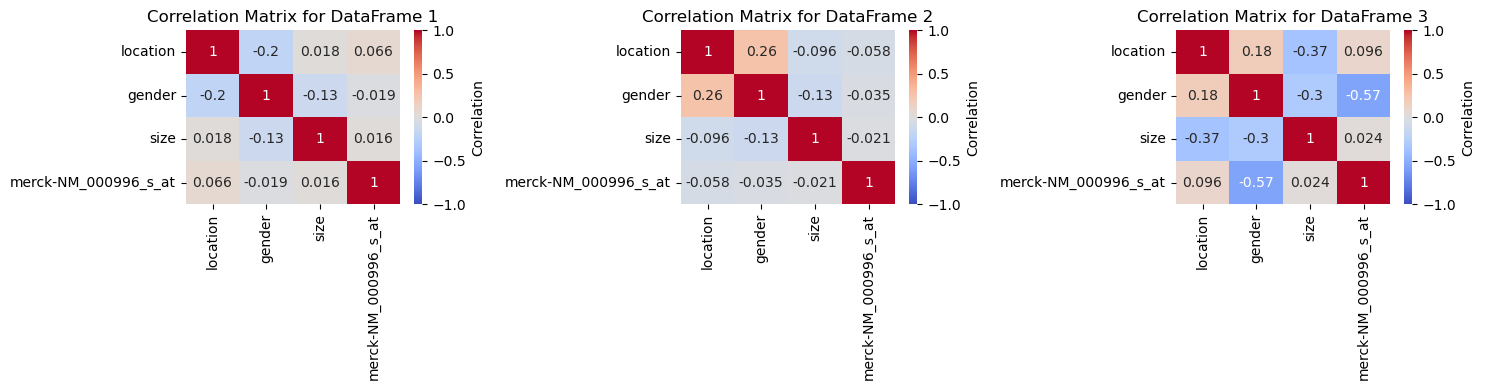

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots with one row and three columns
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for i, df in enumerate([squamous_df, adenocarcinoma_df, other_df], 1):
    
    selected_columns = ['location', 'gender', 'size', 'merck-NM_000996_s_at']  
    numeric_df = df[selected_columns]
    
    correlation_matrix = numeric_df.corr()
    # Plot the heatmap on the corresponding subplot
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar_kws={'label': 'Correlation'}, ax=axes[i-1])
    
    # Set the title using the loop variable i
    title = f'Correlation Matrix for DataFrame {i}'
    if 'type' in df.columns:
        title += f": {df['type'].iloc[0]}"
    axes[i-1].set_title(title)

plt.tight_layout()
plt.show()


From the heatmaps, we know they are no a strong correlation in size, gender,location and probe.

Is there a difference between different type tumor with size? Test using a significance of 𝛼=0.05.

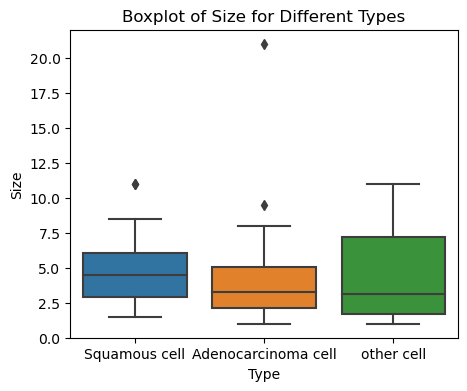

In [29]:
plt.figure(figsize=(5, 4))
sns.boxplot(x='type', y='size', data=df_sample_gene)
plt.xlabel('Type')
plt.ylabel('Size')
plt.title('Boxplot of Size for Different Types')
plt.show()

Looks there are some differece, So I want to check the difference of size between squamous cell and the adenocarcinoma.

#### Statictics

Estimation method: robust
n = 36, mu = 4.5, sigma = 2.298
Expected number of data outside CI: 2


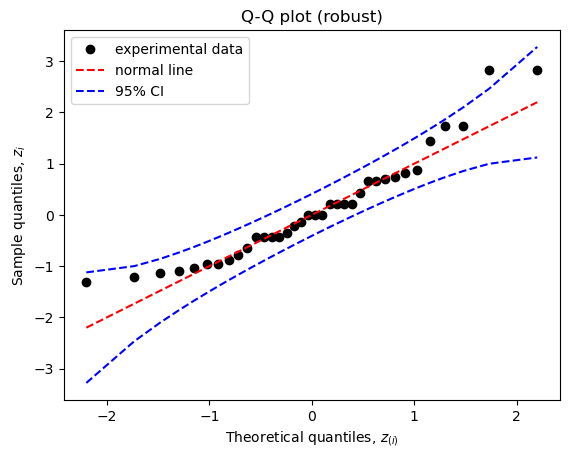

Estimation method: robust
n = 44, mu = 3.3, sigma = 2.15
Expected number of data outside CI: 2


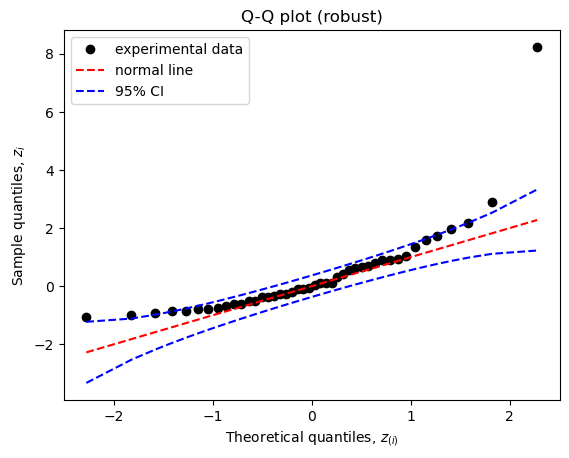

In [30]:
y_size_sq = squamous_df['size']
y_size_ad = adenocarcinoma_df['size']

# check do they follow the normal distribution
um.DS_Q_Q_Plot(y_size_sq)
um.DS_Q_Q_Plot(y_size_ad)

The tumor sizes in the squ_cell and ade_cell  type NSCLC do not follow a normal distribution. So I use the Mannwhitney test to see the difference.


In [31]:
um.DS_2sample_MannWhitney_test_medians(y_size_sq,y_size_ad)

--------------------------------------------------------------------------------
2-sample Mann-Whitney U-test for 2 medians:
     assuming identical distributions for both datasets, that may differ in location
y.med.1 = 4.5, y.med.2 = 3.3, n.1 = 36, n.2 = 44, alpha = 0.05
H0: eta.1  = eta.2
H1: eta != eta*
U.1 = 983, U.2 = 601, U = 601, p-value = 0.0645, z = -1.85, U.crit = nan
................................................................................
Effect size: r    = -0.207; benchmarks |r|: 0.1 = small, 0.3 = medium, 0.5 = large
--------------------------------------------------------------------------------


(983.0, 601.0, 601.0, 0.06454399708207828)

Conclusion:There is no significant difference between the means of the two datasets.

We explore the relationship between location with tumor types

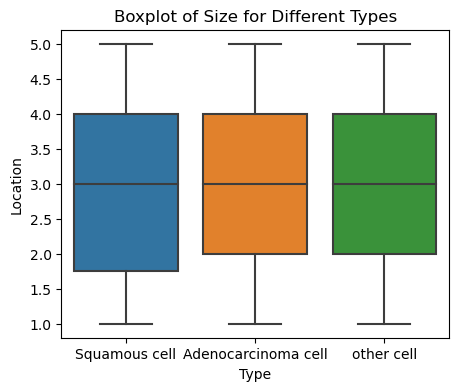

In [32]:
plt.figure(figsize=(5, 4))
sns.boxplot(x='type', y='location', data=df_sample_gene)
plt.xlabel('Type')
plt.ylabel('Location')
plt.title('Boxplot of Size for Different Types')
plt.show()


conclusion: It looks like there is no difference between the location of the tumor with the type of tumor. I suppose there is no necessity to use statistics methods to check.

I explore the gender difference in different types

In [33]:
# I want to check the correlation of types  with gender
grouped1 = df_sample_gene.copy().groupby(['gender'])['type'].describe()
print(grouped1)

       count unique                  top freq
gender                                       
0         60      3        Squamous cell   29
1         29      3  Adenocarcinoma cell   19


SO do we get a result? in male, the squamous cell is the hightest, in female, the adenocarcinomacell is the highest?


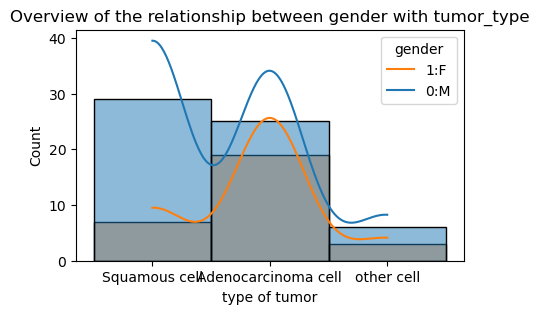

In [34]:
# Make a distribution plot with hue
plt.figure(figsize=(5, 3))
sns.histplot(df_sample_gene, x='type', hue='gender', stat='count', common_norm=False, bins=range(2, 12), kde=True,
             palette='tab10')
plt.title('Overview of the relationship between gender with tumor_type')
plt.xlabel('type of tumor')
plt.ylabel('Count')
plt.legend(title='gender', labels=['1:F','0:M'])
plt.show()

Use chi_square test

In [35]:
def calculate_gender_proportions(df):
    # Assuming 'gender' column contains string values '0' and '1'
    male_counts = df[df['gender'] == 0].shape[0]
    female_counts = df[df['gender'] == 1].shape[0]

    p_male = male_counts / len(df)
    p_female = female_counts / len(df)

    return p_male, p_female

# Calculate proportions for each DataFrame
p_male_sq, p_female_sq = calculate_gender_proportions(squamous_df)
p_male_ad, p_female_ad = calculate_gender_proportions(adenocarcinoma_df)
p_male_ot, p_female_ot = calculate_gender_proportions(other_df)

# Print results
print("Proportion of males in squamous_df:", p_male_sq)
print("Proportion of males in adenocarcinoma_df:", p_male_ad)
print("Proportion of males in other_df:", p_male_ot)

print("\nProportion of females in squamous_df:", p_female_sq)
print("Proportion of females in adenocarcinoma_df:", p_female_ad)
print("Proportion of females in other_df:", p_female_ot)


Proportion of males in squamous_df: 0.8055555555555556
Proportion of males in adenocarcinoma_df: 0.5681818181818182
Proportion of males in other_df: 0.6666666666666666

Proportion of females in squamous_df: 0.19444444444444445
Proportion of females in adenocarcinoma_df: 0.4318181818181818
Proportion of females in other_df: 0.3333333333333333


In [36]:
data = [
    [p_male_sq , p_female_sq],
    [p_male_ad, p_female_ad],
    [p_male_ot, p_female_ot]
]

chi2_stat, p_value, dof, expected = chi2_contingency(data)

print("Chi2 Statistic:", chi2_stat)
print("P-value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:", expected)


Chi2 Statistic: 0.13075169359041167
P-value: 0.9367153357515664
Degrees of Freedom: 2
Expected Frequencies: [[0.68013468 0.31986532]
 [0.68013468 0.31986532]
 [0.68013468 0.31986532]]


Since the p-value is high (0.937), it suggests that you do not have enough evidence to reject the null hypothesis. In other words, there is not enough evidence to conclude that there is a significant difference in the gender proportions among the different types (squamous, adenocarcinoma, other) based on your data.

But in the squ_cell group.
Here we can see there is a significant difference between male and female in Squamous cell in NSCLC

In [37]:
y_sample = df_sample_gene['gender']
y = squamous_df['gender']
um.DS_1sample_ztest_props(y, 0.5)

print('***************')
um.DS_1sample_ztest_props(y_sample, 0.5)

--------------------------------------------------------------------------------
1-sample z-test for 1 proportion:
     assuming Bernoulli(p) data for dataset
Observed dataset: O.1 = 7, O.0 = 29, N = 36
p.ML = 0.194, p* = 0.5, alpha = 0.05
H0: p  = p*
H1: p != p*
* Normal approximation:
z   = -3.667, p-value = 0.0002457, z.crit.L = -1.96, z.crit.R = 1.96
* Normal approximation with continuity correction:
z.c = 3.5, p-value = 0.0004653, z.crit.L = -1.96, z.crit.R = 1.96
* Exact Binomial calculation:
p-value = 0.0003126
................................................................................
Effect size: Cramer's V2 = 0.373; benchmarks V2: 0.01 = small, 0.09 = medium, 0.25 = large
Effect size: Cohens' h = -0.657; benchmarks |h|:  0.2 = small, 0.5 = medium, 0.8 = large
--------------------------------------------------------------------------------

***************
--------------------------------------------------------------------------------
1-sample z-test for 1 proportion:
  

(-3.2859934280197156,
 0.0010162338094363474,
 -1.9599639845400545,
 1.959963984540054)

conclusin
: With a p-value of 0.0137, it suggests that the proportion of 'gender' in the squ_cell type is significantly different. But in chi_square test, there are no any difference in the three types tumors. So I suppose it is a small smaple. And it is unbalance in 89 samples. Plus, in 89 samples, the P values is also less than 0.05. So I believe if there a big sample for Squ_cell, it should indicate the male is more than the female.

Is there any difference between different types and expression values in the probe.

Estimation method: robust
n = 36, mu = 14, sigma = 0.05907
Expected number of data outside CI: 2


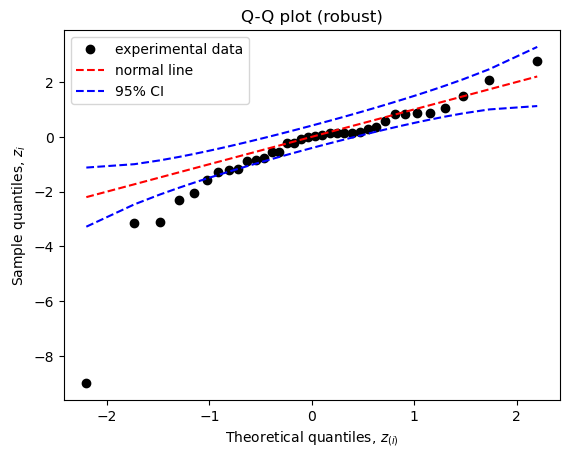

Estimation method: robust
n = 44, mu = 13.87, sigma = 0.1044
Expected number of data outside CI: 2


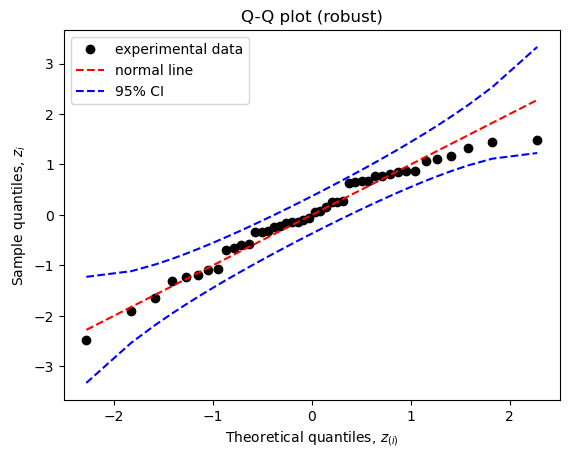

In [38]:
y_probe_sq = squamous_df['merck-NM_000996_s_at']
y_probe_ad = adenocarcinoma_df['merck-NM_000996_s_at']

# check do they follow the normal distribution
um.DS_Q_Q_Plot(y_probe_sq)
um.DS_Q_Q_Plot(y_probe_ad)



The data of the probe expression values in different type tumor do not follow the distribution.
So I use the Mannwhitney test for the two samples

In [39]:
um.DS_2sample_MannWhitney_test_medians(y_probe_sq,y_probe_ad)

--------------------------------------------------------------------------------
2-sample Mann-Whitney U-test for 2 medians:
     assuming identical distributions for both datasets, that may differ in location
y.med.1 = 14, y.med.2 = 13.87, n.1 = 36, n.2 = 44, alpha = 0.05
H0: eta.1  = eta.2
H1: eta != eta*
U.1 = 1.29e+03, U.2 = 294, U = 294, p-value = 1.46e-06, z = -4.82, U.crit = nan
................................................................................
Effect size: r    = -0.538; benchmarks |r|: 0.1 = small, 0.3 = medium, 0.5 = large
--------------------------------------------------------------------------------


(1290.0, 294.0, 294.0, 1.4614885547918162e-06)

Conclusion:The p-value is very small (1.46e-06), suggesting strong evidence that there is a significant difference between the medians of the two groups.

### Summary: Based on these datasets, there is no difference between location and size with different tumor types in NSCLC.The proportion of males in squ_cell might be higher than in other types, but because of the small sample, we could not find the difference by chi-square test. The median expressions of the 'Merck-NM_000996_s_at' probe in ade_cell type are significantly different from the Squ_cell samples.

### Dashboard


some code of dashboras from chapgpt 3.5

In [40]:
import panel as pn
from bokeh.plotting import figure


def render_gender_plot():
    p = figure(title="the gender in different types", x_range=df_sample_gene['type'].unique(), background_fill_color="#fafafa")
    p.xaxis.axis_label = "type"
    p.yaxis.axis_label = "porprotion of male"

    
    for gender, color in zip([0, 1], ['blue', 'pink']):
        p.vbar(x=df_sample_gene['type'][df_sample_gene['gender'] == gender],
               top=df_sample_gene['gender'][df_sample_gene['gender'] == gender].count() / len(df_sample_gene['gender']),
               width=0.5, legend_label=f"Gender {gender}", line_color="white", fill_color=color, alpha=0.8)

    p.legend.location = "top_left"
    p.legend.orientation = "horizontal"

    return p


def render_size_plot():
    p = figure(title="the sizes in different types", x_range=df_sample_gene['type'].unique(), background_fill_color="#fafafa")
    p.xaxis.axis_label = "type"
    p.yaxis.axis_label = "size"

    
    p.vbar(x=df_sample_gene['type'], top=df_sample_gene.groupby('type')['size'].mean(),
           width=0.5, line_color="white", fill_color="green", alpha=0.8)

    return p


def render_location_plot():
    p = figure(title="the location in different types", background_fill_color="#fafafa")
    p.xaxis.axis_label = "type"
    p.yaxis.axis_label = "location"

    for tumor_type, color in zip(df_sample_gene['type'].unique(), ['blue', 'green', 'red']):
        subset = df_sample_gene[df_sample_gene['type'] == tumor_type]
        p.scatter(x=subset['location'], y=subset['size'],
                    legend_label=tumor_type,
                    fill_alpha=0.6,
                    size=7,
                    color=color,
                    marker='hex')

  
    p.legend.location = "top_left"

    return p


def render_probe_plot():
    p = figure(title="the expression in different types", background_fill_color="#fafafa")
    p.xaxis.axis_label = "type"
    p.yaxis.axis_label = "merck-NM_000996_s_at"

    
    for tumor_type, color in zip(df_sample_gene['type'].unique(), ['blue', 'green', 'red']):
        subset = df_sample_gene[df_sample_gene['type'] == tumor_type]
        p.scatter(x=subset['merck-NM_000996_s_at'], y=subset['size'],
                  legend_label=tumor_type,
                  fill_alpha=0.6,
                  size=7,
                  color=color,
                  marker='hex')

  
    p.legend.location = "top_left"

    return p

gender_plot = pn.interact(render_gender_plot)
size_plot = pn.interact(render_size_plot)
location_plot = pn.interact(render_location_plot)
probe_plot = pn.interact(render_probe_plot)


dashboard = pn.Tabs(
    ("gender", pn.Column(gender_plot[0], gender_plot[1])),
    ("size", pn.Column(size_plot[0], size_plot[1])),
    ("location", pn.Column(location_plot[0], location_plot[1])),
    ("probe", pn.Column(probe_plot[0], probe_plot[1]))
)


dashboard.show(title="the dashboard of correlation")


Launching server at http://localhost:53407
